In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import gensim

In [9]:
dataset_path = 'dm_stories_tokenized/'
files = os.listdir(dataset_path)

In [10]:
print(open(dataset_path + files[0]).read())

Will children of the future be taught solely by a computer ? That could be a possibility , according to Google 's vice-president of research Alfred Spector .

He said he thinks apps and technologies that are widely derided as being distracting could actually improve how we learn .

And he says this may lead to a future where students do not need to go to school in order to get a formal education .

Google 's Alfred Spector -LRB- shown -RRB- says technology could replace teachers in future . He made the comments at the World-Changing Ideas Summit in New York . Tech we usually find distracting could be used to help students learn . He says even simple apps could improve their educational experience -LRB- stock image shown -RRB-

Speaking at the BBC 's World-Changing Ideas Summit in New York earlier this week , he said even simple apps could improve education .

He points to apps already on the market like Duolingo , which teaches languages through games , as beginning the shift to techno

In [28]:
documents = []
summaries = []
sentences = []
tokenized_documents = []
tokenized_summaries = []
summary_lengths = {}

for i in range(len(files)):
    filename = files[i]
    in_summary = False
    summary = []
    document = []
    with open(dataset_path + filename, 'r') as file:
        lines = file.readlines()
        for line in lines:        
            line = line.strip()
            if '@highlight' in line:
                in_summary = True
                continue
                
            if (len(line) == 0):
                continue
                
            if in_summary:
                summary.append(line)
            else:
                document.append(line)
        file.close()
        
    documents.append('. '.join(document))
    summaries.append('. '.join(summary))
    sentences.extend([sen.split(" ") for sen in document])
    tokenized_documents.append(document)
    tokenized_summaries.append(summary)
        
    if str(len(summary)) in summary_lengths:
        summary_lengths[str(len(summary))].append(i)
    else:
        summary_lengths[str(len(summary))] = [i]
        

In [29]:
print("DOC: ----- \n" + documents[0])
print("SUMMARY: ----- \n" + summaries[0])
print("LENGTHS: -----\n" + str(summary_lengths))

DOC: ----- 
Will children of the future be taught solely by a computer ? That could be a possibility , according to Google 's vice-president of research Alfred Spector .. He said he thinks apps and technologies that are widely derided as being distracting could actually improve how we learn .. And he says this may lead to a future where students do not need to go to school in order to get a formal education .. Google 's Alfred Spector -LRB- shown -RRB- says technology could replace teachers in future . He made the comments at the World-Changing Ideas Summit in New York . Tech we usually find distracting could be used to help students learn . He says even simple apps could improve their educational experience -LRB- stock image shown -RRB-. Speaking at the BBC 's World-Changing Ideas Summit in New York earlier this week , he said even simple apps could improve education .. He points to apps already on the market like Duolingo , which teaches languages through games , as beginning the shi

# Topic, Sentence Correlation

In [172]:
def plot_topic_error(num_sentences, topic_range, summary_lengths, documents, summaries):    
    vectorizer = CountVectorizer()
    doc_vec = vectorizer.fit_transform(documents)
    
    errors = {}

    for num_topics in topic_range:
        print('Training on ' + str(num_topics) + ' topics.')
        
        error = 0
        for doc_id in summary_lengths[num_sentences]:
            lda = LDA(n_components=num_topics, learning_method='online')
            lda.fit(doc_vec[doc_id])
            error += lda.score(doc_vec[doc_id])
        
        errors[num_topics] = error

    topic_errors = [errors[n_topics] for n_topics in errors]
    plt.plot(topic_range, topic_errors)
    plt.xlabel('Number of Topics')
    plt.ylabel('Error')
    plt.title('Length: ' + num_sentences + ' Sentences')

Training on 2 topics.
Training on 3 topics.
Training on 4 topics.
Training on 5 topics.
Training on 6 topics.
Training on 7 topics.
Training on 8 topics.
Training on 9 topics.


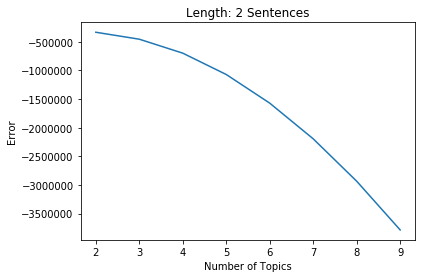

In [173]:
plot_topic_error('2', np.arange(2, 10), summary_lengths, documents, summaries)

Training on 2 topics.
Training on 3 topics.
Training on 4 topics.
Training on 5 topics.
Training on 6 topics.
Training on 7 topics.
Training on 8 topics.
Training on 9 topics.


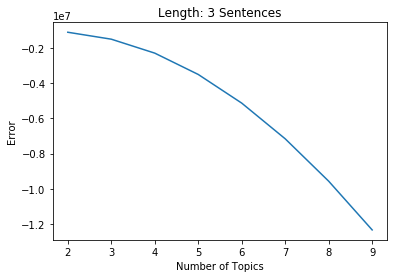

In [174]:
plot_topic_error('3', np.arange(2, 10), summary_lengths, documents, summaries)

Training on 2 topics.
Training on 3 topics.
Training on 4 topics.
Training on 5 topics.
Training on 6 topics.
Training on 7 topics.
Training on 8 topics.
Training on 9 topics.


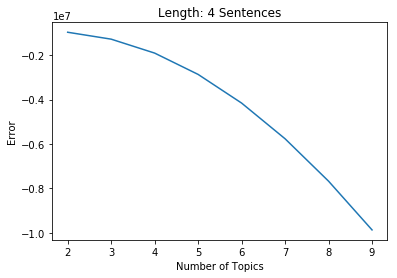

In [175]:
plot_topic_error('4', np.arange(2, 10), summary_lengths, documents, summaries)

Training on 2 topics.
Training on 3 topics.
Training on 4 topics.
Training on 5 topics.
Training on 6 topics.
Training on 7 topics.
Training on 8 topics.
Training on 9 topics.


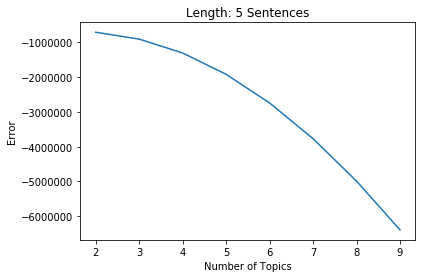

In [176]:
plot_topic_error('5', np.arange(2, 10), summary_lengths, documents, summaries)

# Sentence Similarity

In [34]:
# generate gensim doc2vec model
model = gensim.models.doc2vec.Doc2Vec()
training_corpus = [gensim.models.doc2vec.TaggedDocument(sen, [i]) for (i, sen) in enumerate(sentences)]
model.build_vocab(training_corpus)
model.train(training_corpus, total_examples=model.corpus_count, epochs=model.iter)

1636186

In [35]:
# take the sentences from a summary and the sentences from the document
summary = tokenized_summaries[0]
document = tokenized_documents[0]

In [63]:
def plot_summary_similarity(summary, document):
    print('Summary contains ' + str(len(summary)) + ' sentences.')
    
    sentence_similarities = {}
    for summ_sent in summary:
        for doc_sent in document:
            similarity = model.docvecs.similarity_unseen_docs(model, summ_sent.split(" "), doc_sent.split(" "))
            if summ_sent in sentence_similarities:
                sentence_similarities[summ_sent] += similarity
            else:
                sentence_similarities[summ_sent] = similarity
        sentence_similarities[summ_sent] /= len(document)
    
    summ_sentences = list(sentence_similarities.keys())
    sims = [sentence_similarities[sent] for sent in sentence_similarities]
    
    plt.bar(np.arange(len(summ_sentences)), sims)
    plt.ylabel('Average Similarity in Document')
    plt.xlabel('Sentence Number in Summary')
    plt.xticks(np.arange(len(summ_sentences)))

Summary contains 2 sentences.


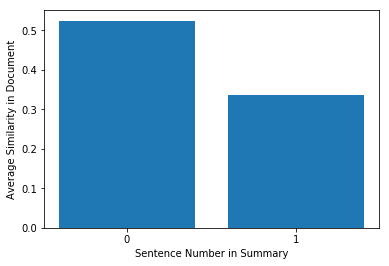

In [79]:
tok_summ = tokenized_summaries[1]
tok_doc = tokenized_documents[1]
plot_summary_similarity(tok_summ, tok_doc)

Summary contains 3 sentences.


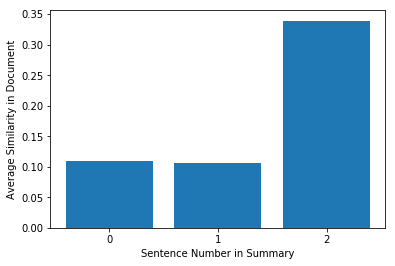

In [80]:
tok_summ = tokenized_summaries[5]
tok_doc = tokenized_documents[5]
plot_summary_similarity(tok_summ, tok_doc)

Summary contains 4 sentences.


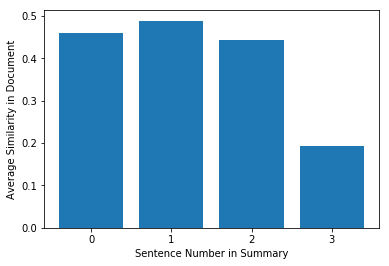

In [81]:
tok_summ = tokenized_summaries[3]
tok_doc = tokenized_documents[3]
plot_summary_similarity(tok_summ, tok_doc)

Summary contains 5 sentences.


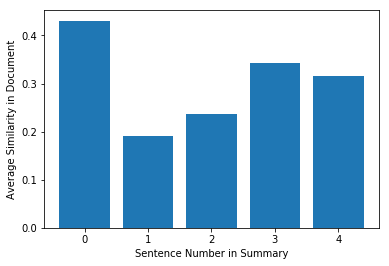

In [82]:
tok_summ = tokenized_summaries[2]
tok_doc = tokenized_documents[2]
plot_summary_similarity(tok_summ, tok_doc)

Summary contains 6 sentences.


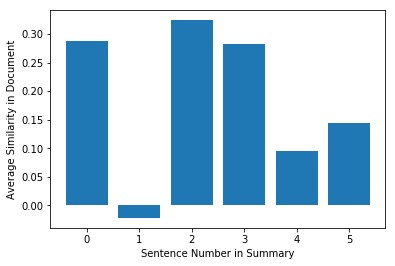

In [83]:
tok_summ = tokenized_summaries[0]
tok_doc = tokenized_documents[0]
plot_summary_similarity(tok_summ, tok_doc)

In [123]:
def plot_average_summary_similarity(batch_summaries, batch_documents):
    print(str(len(batch_summaries)) + ' summaries containing ' + str(len(batch_summaries[0])) + ' sentences.')
    
    sentence_similarities = {}
    total_num_sentences = 0
    for id in range(len(batch_summaries)):
        summ = batch_summaries[id]
        doc = batch_documents[id]
        
        for i in range(len(summ)):
            summ_sent = summ[i]
            for doc_sent in doc:
                similarity = model.docvecs.similarity_unseen_docs(model, summ_sent.split(" "), doc_sent.split(" "))
                if i in sentence_similarities:
                    sentence_similarities[i] += similarity
                else:
                    sentence_similarities[i] = similarity

        total_num_sentences += len(doc)
            
    for sen_num in sentence_similarities:
        sentence_similarities[sen_num] /= total_num_sentences
    
    summ_sentences = list(sentence_similarities.keys())
    sims = [sentence_similarities[sent] for sent in sentence_similarities]
    
    plt.bar(np.arange(len(summ_sentences)), sims)
    plt.ylabel('Average Similarity in Document')
    plt.xlabel('Sentence Number in Summary')
    plt.xticks(np.arange(len(summ_sentences)))

20 summaries containing 2 sentences.


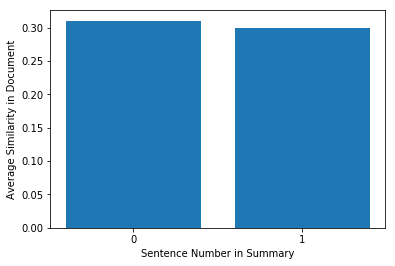

In [139]:
# get documents with summaries of length 2
doc_ids = summary_lengths['2']
batch_documents = [tokenized_documents[doc_id] for doc_id in doc_ids]
batch_summaries = [tokenized_summaries[doc_id] for doc_id in doc_ids]

plot_average_summary_similarity(batch_summaries[0:20], batch_documents[0:20])

20 summaries containing 3 sentences.


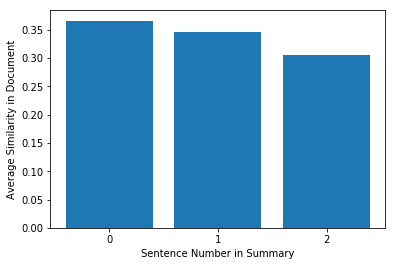

In [140]:
# get documents with summaries of length 3
doc_ids = summary_lengths['3']
batch_documents = [tokenized_documents[doc_id] for doc_id in doc_ids]
batch_summaries = [tokenized_summaries[doc_id] for doc_id in doc_ids]

plot_average_summary_similarity(batch_summaries[0:20], batch_documents[0:20])

20 summaries containing 4 sentences.


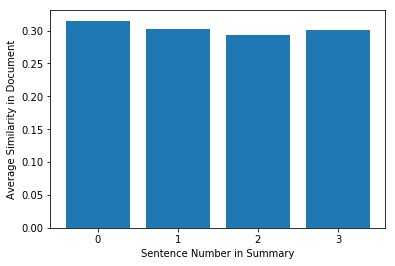

In [141]:
# get documents with summaries of length 4
doc_ids = summary_lengths['4']
batch_documents = [tokenized_documents[doc_id] for doc_id in doc_ids]
batch_summaries = [tokenized_summaries[doc_id] for doc_id in doc_ids]

plot_average_summary_similarity(batch_summaries[0:20], batch_documents[0:20])

20 summaries containing 5 sentences.


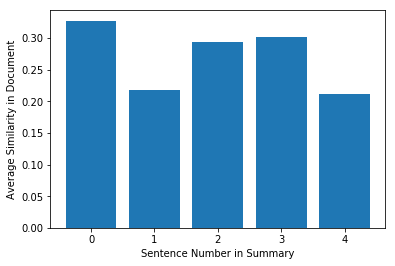

In [142]:
# get documents with summaries of length 5
doc_ids = summary_lengths['5']
batch_documents = [tokenized_documents[doc_id] for doc_id in doc_ids]
batch_summaries = [tokenized_summaries[doc_id] for doc_id in doc_ids]

plot_average_summary_similarity(batch_summaries[0:20], batch_documents[0:20])

20 summaries containing 6 sentences.


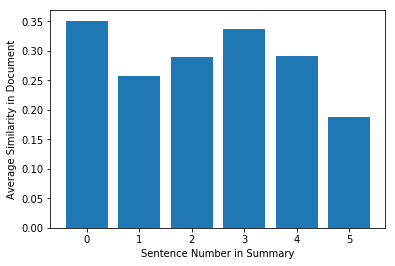

In [143]:
# get documents with summaries of length 6
doc_ids = summary_lengths['6']
batch_documents = [tokenized_documents[doc_id] for doc_id in doc_ids]
batch_summaries = [tokenized_summaries[doc_id] for doc_id in doc_ids]

plot_average_summary_similarity(batch_summaries[0:20], batch_documents[0:20])

19 summaries containing 7 sentences.


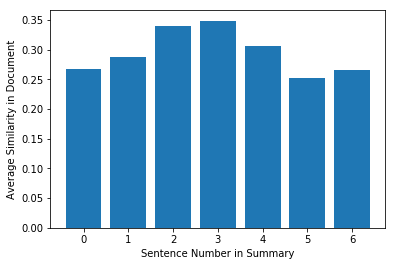

In [144]:
# get documents with summaries of length 7
doc_ids = summary_lengths['7']
batch_documents = [tokenized_documents[doc_id] for doc_id in doc_ids]
batch_summaries = [tokenized_summaries[doc_id] for doc_id in doc_ids]

plot_average_summary_similarity(batch_summaries[0:20], batch_documents[0:20])

7 summaries containing 8 sentences.


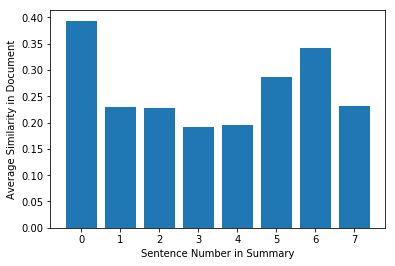

In [145]:
# get documents with summaries of length 8
doc_ids = summary_lengths['8']
batch_documents = [tokenized_documents[doc_id] for doc_id in doc_ids]
batch_summaries = [tokenized_summaries[doc_id] for doc_id in doc_ids]

plot_average_summary_similarity(batch_summaries[0:20], batch_documents[0:20])

3 summaries containing 9 sentences.


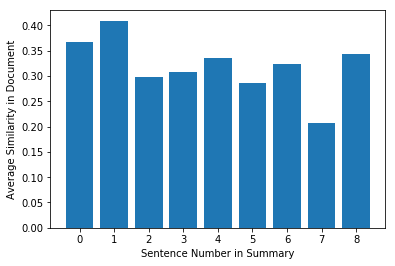

In [146]:
# get documents with summaries of length 9
doc_ids = summary_lengths['9']
batch_documents = [tokenized_documents[doc_id] for doc_id in doc_ids]
batch_summaries = [tokenized_summaries[doc_id] for doc_id in doc_ids]

plot_average_summary_similarity(batch_summaries[0:20], batch_documents[0:20])

1 summaries containing 10 sentences.


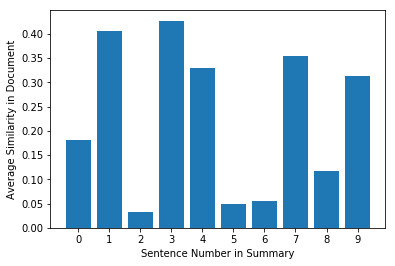

In [147]:
# get documents with summaries of length 10
doc_ids = summary_lengths['10']
batch_documents = [tokenized_documents[doc_id] for doc_id in doc_ids]
batch_summaries = [tokenized_summaries[doc_id] for doc_id in doc_ids]

plot_average_summary_similarity(batch_summaries[0:20], batch_documents[0:20])